# Using the xtractomatic routines

The `xtractomatic` package is used to subset data from a remote servers.

It can be used with a `lon`, `lat`, `time` track (like a drifter trajectory),
3D bounding box, or within a polygon.

Because `xtractomatic` and its dependencies are not available as `conda` packages we need to install them directly from `CRAN` using `install.packages`.
Below is a list of packages that we'll need to reproduce the [`xtractomatic`](http://coastwatch.pfeg.noaa.gov/xtracto/R/using_xtractomatic_r.html) webpage example.

```shell
# `xtractomatic` dependencies.
install.packages("httr", dependencies = TRUE)
install.packages("ncdf4")
install.packages("sp")

# Used in the examples.
install.packages("ggplot2")
install.packages("ggfortify")
install.packages("lubridate")
install.packages("mapdata")
install.packages("RColorBrewer")
install.packages("reshape2")
install.packages("xts")

install.packages("xtractomatic")
```

In [1]:
require(xtractomatic)

str(Marlintag38606)

Loading required package: xtractomatic


'data.frame':	152 obs. of  7 variables:
 $ date  : Date, format: "2003-04-23" "2003-04-24" ...
 $ lon   : num  204 204 204 204 204 ...
 $ lat   : num  19.7 19.8 20.4 20.3 20.3 ...
 $ lowLon: num  204 204 204 204 204 ...
 $ higLon: num  204 204 204 204 204 ...
 $ lowLat: num  19.7 18.8 18.8 18.9 18.9 ...
 $ higLat: num  19.7 20.9 21.9 21.7 21.7 ...


In [2]:
tagData <- Marlintag38606
xpos <- tagData$lon
ypos <- tagData$lat
tpos <- tagData$date
swchl <- xtracto(xpos, ypos, tpos, "swchla8day", xlen = .2, ylen = .2)

In [3]:
str(swchl)

'data.frame':	152 obs. of  11 variables:
 $ mean             : num  0.073 NaN 0.074 0.0653 0.0403 ...
 $ stdev            : num  NA NA 0.00709 0.00768 0.02278 ...
 $ n                : int  1 0 16 4 7 9 4 3 0 6 ...
 $ satellite date   : chr  "2003-04-19T00:00:00Z" "2003-04-27T00:00:00Z" "2003-04-27T00:00:00Z" "2003-04-27T00:00:00Z" ...
 $ requested lon min: num  204 204 204 204 204 ...
 $ requested lon max: num  204 204 204 204 204 ...
 $ requested lat min: num  19.6 19.7 20.3 20.2 20.2 ...
 $ requested lat max: num  19.8 19.9 20.5 20.4 20.4 ...
 $ requested date   : num  12165 12166 12172 12173 12174 ...
 $ median           : num  0.073 NA 0.073 0.0645 0.031 ...
 $ mad              : num  0 NA 0.00297 0.00741 0.0089 ...


Loading required package: ggplot2
Loading required package: mapdata
Loading required package: maps


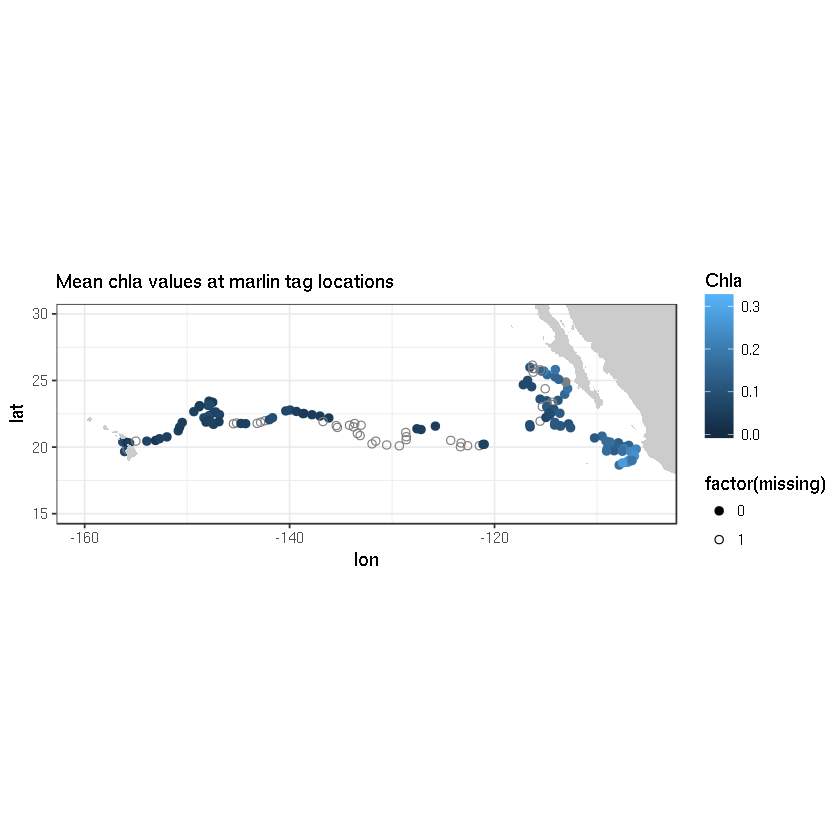

In [4]:
require(ggplot2)
require(mapdata)
# First combine the two dataframes (the input and the output) into one, 
# so it will be easy to take into account the locations that didn’t 
# retrieve a value.

alldata <- cbind(tagData, swchl)

# adjust the longitudes to be (-180,180)
alldata$lon <- alldata$lon - 360
# Create a variable that shows if chla is missing
alldata$missing <- is.na(alldata$mean) * 1
# set limits of the map
ylim <- c(15, 30)
xlim <- c(-160, -105)
# get outline data for map
w <- map_data("worldHires", ylim = ylim, xlim = xlim)
# plot using ggplot
z <- ggplot(alldata, aes(x = lon, y = lat)) + 
   geom_point(aes(colour = mean,shape = factor(missing)), size = 2.) + 
  scale_shape_manual(values = c(19, 1))
z + geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = "grey80") + 
  theme_bw() + 
  scale_colour_gradient(limits = c(0., 0.32), "Chla") + 
  coord_fixed(1.3, xlim = xlim, ylim = ylim) + ggtitle("Mean chla values at marlin tag locations")

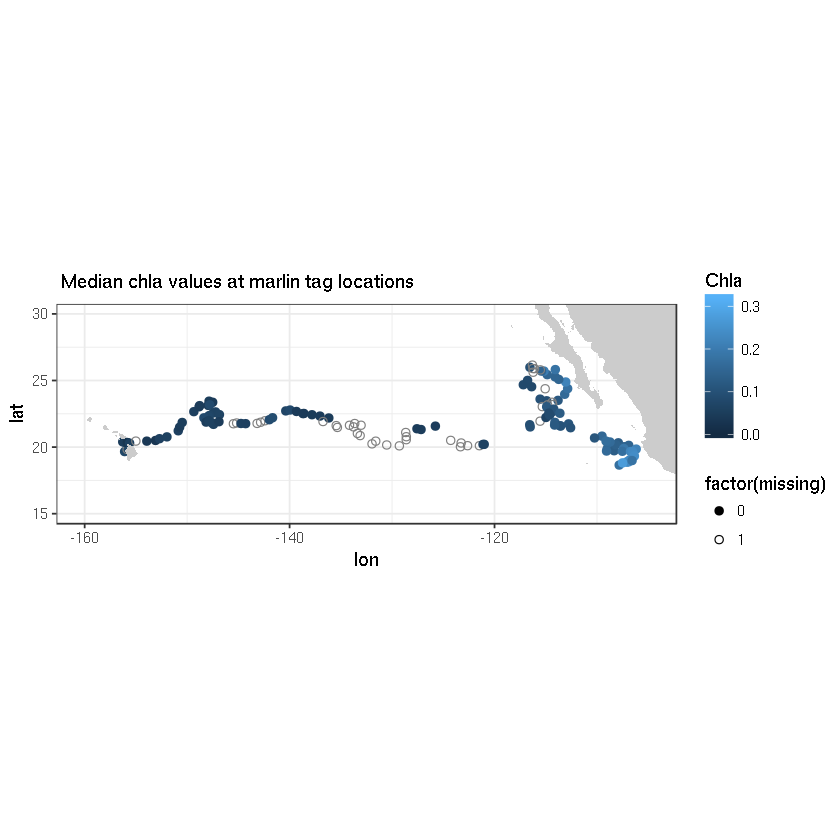

In [5]:
# plot using ggplot
z <- ggplot(alldata, aes(x = lon, y = lat)) + 
   geom_point(aes(colour = median, shape = factor(missing)), size = 2.) + 
  scale_shape_manual(values = c(19, 1))
z + geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = "grey80") + 
  theme_bw() + 
  scale_colour_gradient(limits = c(0., 0.32), "Chla") + 
  coord_fixed(1.3, xlim = xlim, ylim = ylim) + ggtitle(" Median chla values at marlin tag locations")

In [6]:
ylim <- c(15, 30)
xlim <- c(-160, -105)
topo <- xtracto(tagData$lon, tagData$lat, tagData$date, "ETOPO360", .1, .1)

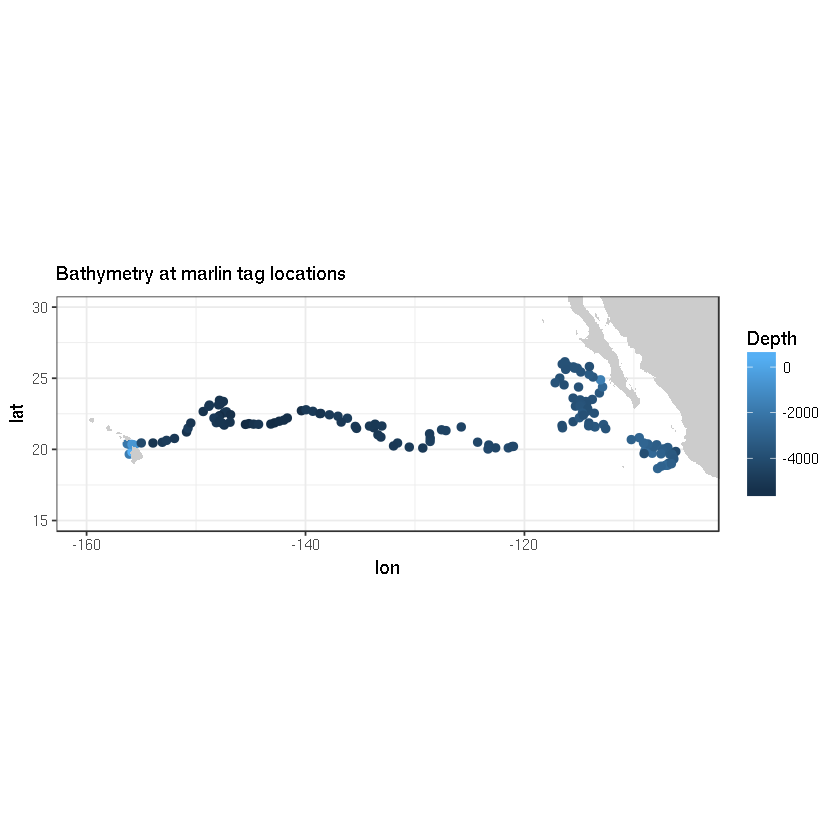

In [7]:
ylim <- c(15, 30)
xlim <- c(-160, -105)
alldata <- cbind(tagData, topo)
alldata$lon <- alldata$lon - 360
z <- ggplot(alldata, aes(x = lon, y = lat)) + 
   geom_point(aes(colour = mean), size = 2.) + 
  scale_shape_manual(values = c(19, 1))
z + geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = "grey80") + 
  theme_bw() + 
  scale_colour_gradient("Depth") + 
  coord_fixed(1.3, xlim = xlim, ylim = ylim) + ggtitle("Bathymetry at marlin tag locations")

In [8]:
datafile <- system.file("extdata", "Marlin-tag38606.txt", package = "xtractomatic")

In [9]:
Marlingtag38606 <- read.csv(datafile, head=TRUE, stringsAsFactors = FALSE, sep="\t")
str(Marlingtag38606)

'data.frame':	152 obs. of  7 variables:
 $ date  : chr  "4/23/2003" "4/24/2003" "4/30/2003" "5/1/2003" ...
 $ lon   : num  204 204 204 204 204 ...
 $ lat   : num  19.7 19.8 20.4 20.3 20.3 ...
 $ lowLon: num  204 204 204 204 204 ...
 $ higLon: num  204 204 204 204 204 ...
 $ lowLat: num  19.7 18.8 18.8 18.9 18.9 ...
 $ higLat: num  19.7 20.9 21.9 21.7 21.7 ...


In [10]:
Marlintag38606$date <- as.Date(Marlintag38606$date, format='%m/%d/%Y')

In [11]:
xrad <- abs(Marlintag38606$higLon - Marlintag38606$lowLon)
yrad <- abs(Marlintag38606$higLat - Marlintag38606$lowLat)

In [12]:
xpos <- c(235, 240)
ypos <- c(36, 39)
tpos <- c('1998-01-01', '2014-11-30') 

In [13]:
require("lubridate")
tpos <- c("1998-01-16", "last")
SeaWiFS <- xtracto_3D(xpos, ypos, tpos, 'swchlamday')
SeaWiFS$time <- as.Date(SeaWiFS$time)

Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [14]:
getInfo("mhchlamday")

[1] "mhchlamday"
                                                                                                    
dtypename                                                                                 mhchlamday
datasetname                                                                           erdMH1chlamday
longname          Chlorophyll-a, Aqua MODIS, NPP, L3SMI, Global, Science Quality (Monthly Composite)
varname                                                                                  chlorophyll
hasAlt                                                                                         FALSE
latSouth                                                                                       FALSE
lon360                                                                                         FALSE
minLongitude                                                                               -179.9792
maxLongitude                                                              

In [15]:
tpos <- c("2003-01-16", "last")
MODIS <- xtracto_3D(xpos, ypos, tpos, "mhchlamday")
MODIS$time <- as.Date(MODIS$time)

In [16]:
tpos <- c("2012-01-15", "last")
VIIRS <- xtracto_3D(xpos, ypos, tpos, "erdVH2chlamday")
VIIRS$time <- as.Date(VIIRS$time)

In [17]:
mapFrame <- function(longitude, latitude, chla) {
  dims <- dim(chla)
  chla <- array(chla, dims[1] * dims[2])
  longitude <- longitude - 360
  chlaFrame <- expand.grid(x=longitude, y=latitude)
  chlaFrame$chla <- chla
  return(chlaFrame)
}

In [18]:
plotFrame <- function(chlaFrame, xlim, ylim, title, logplot = TRUE){
  require(mapdata)
  require(ggplot2)
  require(RColorBrewer)
  w <- map_data("worldHires", ylim = ylim, xlim = xlim)
  myplot <- ggplot(data = chlaFrame, aes(x = x, y = y, fill = chla)) +
    geom_raster(interpolate = FALSE) +
    geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = "grey80") +
    theme_bw() + ylab("latitude") + xlab("longitude") +
    coord_fixed(1.3, xlim = xlim, ylim = ylim)
  if (logplot) {
     my.col <- colorRampPalette(rev(brewer.pal(11, "RdBu")))(5.5)  
    myplot <- myplot + scale_fill_gradientn(colours = my.col, na.value = NA, limits = c(-2, 4.5)) +
      ggtitle(title)
    }else{
     my.col <- colorRampPalette(rev(brewer.pal(11, "RdBu")))((diff(range(chlaFrame$chla, na.rm = TRUE)))) 
     myplot <- myplot + scale_fill_gradientn(colours = my.col, na.value = NA) +
       ggtitle(title)
  }
  return(myplot)
}

Loading required package: RColorBrewer
Warning message:
“Removed 4462 rows containing missing values (geom_raster).”

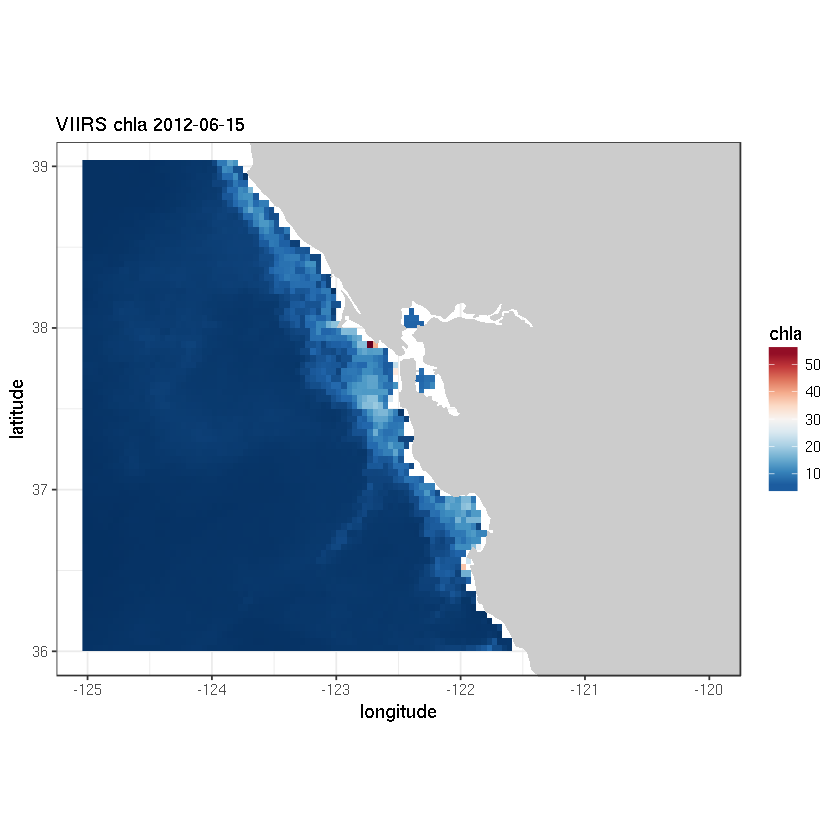

In [19]:
xlim <- c(235, 240) - 360
ylim <- c(36, 39)
ttext <- VIIRS$time[month(VIIRS$time) == 6 & year(VIIRS$time) == 2012]
chlaFrame <- mapFrame(VIIRS$longitude, VIIRS$latitude, VIIRS$data[, , month(VIIRS$time) == 6 & year(VIIRS$time) == 2012])
chlaPlot <- plotFrame(chlaFrame, xlim, ylim, paste("VIIRS chla", ttext), logplot=FALSE)
chlaPlot

Warning message:
“Removed 4462 rows containing missing values (geom_raster).”

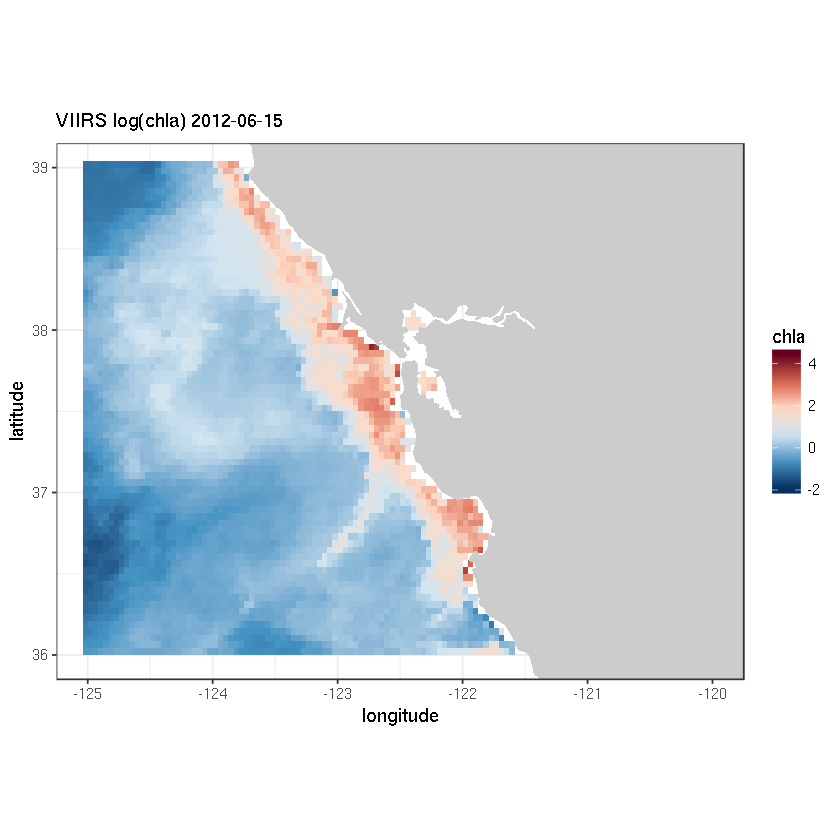

In [20]:
xlim <-c(235, 240) - 360
ylim <-c(36, 39)
chlalogFrame <- mapFrame(VIIRS$longitude, VIIRS$latitude,
                        log(VIIRS$data[, , month(VIIRS$time) == 6 & year(VIIRS$time) == 2012]))
chlalogPlot <- plotFrame(chlalogFrame, xlim, ylim, paste("VIIRS log(chla)", ttext))
chlalogPlot

Warning message:
“Removed 4502 rows containing missing values (geom_raster).”

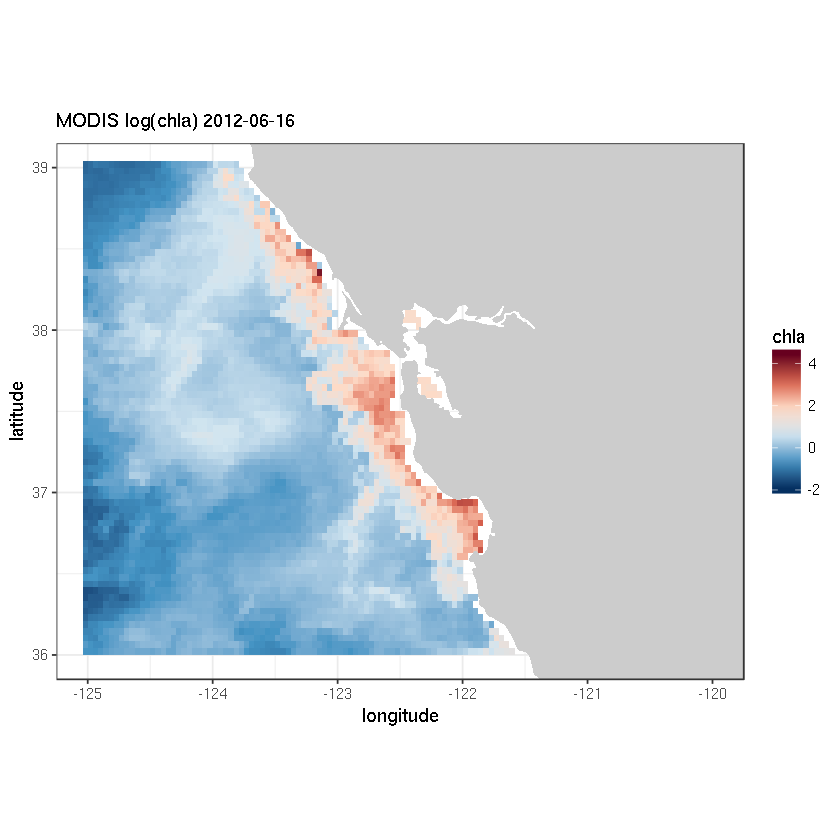

In [21]:
xlim <- c(235, 240) - 360
ylim <- c(36, 39)
ttext <- MODIS$time[month(MODIS$time) == 6 & year(MODIS$time) == 2012]
chlalogFrame <- mapFrame(MODIS$longitude,MODIS$latitude,
                        log(MODIS$data[,,month(MODIS$time) == 6 & year(MODIS$time) == 2012]))
chlalogPlot <- plotFrame(chlalogFrame, xlim, ylim, paste("MODIS log(chla)", ttext))
chlalogPlot

Warning message:
“Removed 1133 rows containing missing values (geom_raster).”

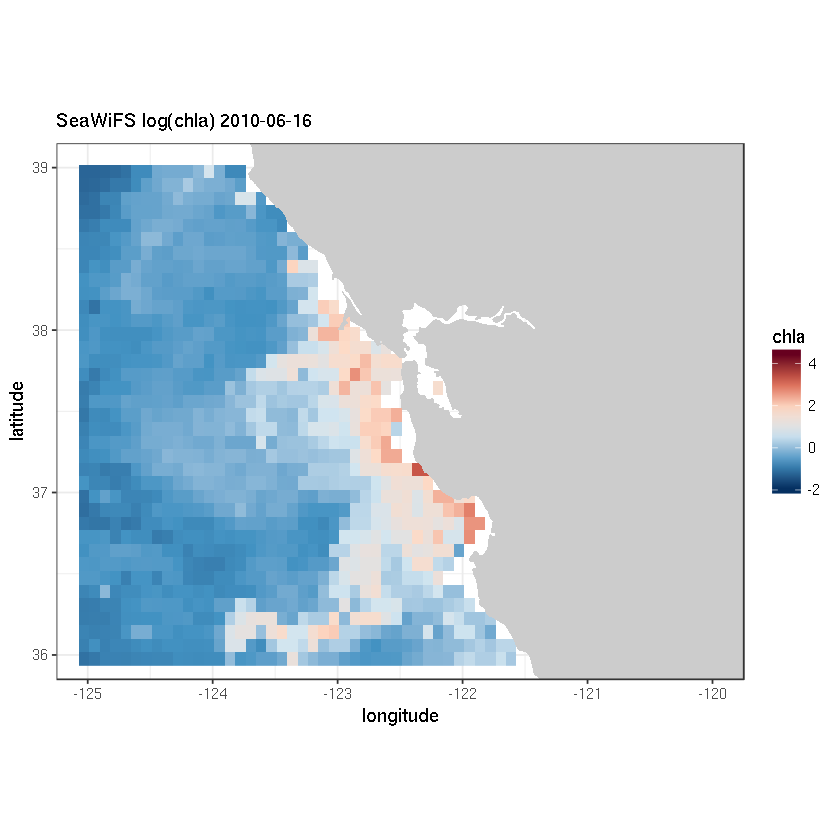

In [22]:
xlim<-c(235,240)-360
ylim<-c(36,39)
ttext<-SeaWiFS$time[month(SeaWiFS$time) == 6 & year(SeaWiFS$time) == 2010]
chlalogFrame<-mapFrame(SeaWiFS$longitude,SeaWiFS$latitude,
                       log(SeaWiFS$data[,,month(SeaWiFS$time) == 6 & year(SeaWiFS$time) == 2010]))
chlalogPlot<-plotFrame(chlalogFrame,xlim,ylim,paste("SeaWiFS log(chla)",ttext))
chlalogPlot

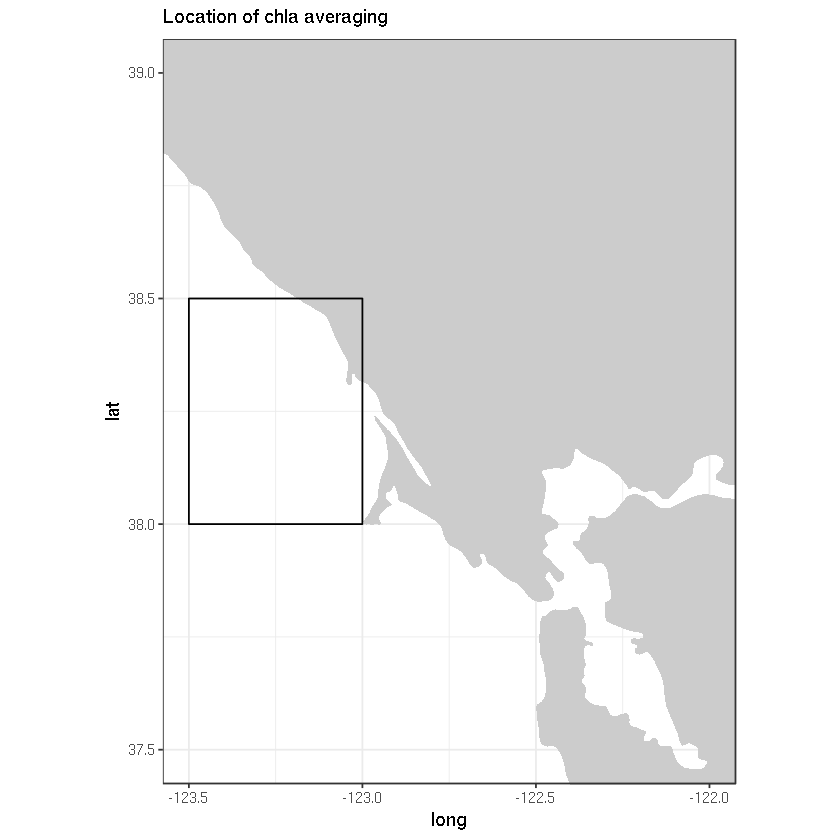

In [23]:
require("mapdata")
xlim1 <- c(-123.5, -123) + 360
ylim1 <- c(38, 38.5)
w <- map_data("worldHires", ylim = c(37.5,39), xlim = c(-123.5, -122.))
z <- ggplot() + geom_polygon(data = w, aes(x=long, y = lat, group = group), fill = "grey80") +
     theme_bw() +
     coord_fixed(1.3, xlim = c(-123.5,-122.), ylim = c(37.5,39))
z + geom_rect(aes(xmin = -123.5, xmax = -123., ymin=38., ymax=38.5), colour="black", alpha=0.) +
    theme_bw() + ggtitle("Location of chla averaging")

In [24]:
chlaAvg <- function(longitude,latitude,chlaData,xlim,ylim,dStart) {
  xIndex <- xlim
  yIndex <- ylim
  yIndex[1] <- which.min(abs(latitude - ylim[1]))
  yIndex[2] <- which.min(abs(latitude - ylim[2]))
  xIndex[1] <- which.min(abs(longitude- xlim[1]))
  xIndex[2] <- which.min(abs(longitude- xlim[2]))
  tempData <- chlaData[xIndex[1]:xIndex[2], yIndex[1]:yIndex[2],]
  chlaAvg <- apply(tempData, 3, mean, na.rm=TRUE)
  chlaAvg <- ts(chlaAvg, frequency = 12, start = dStart)
return(chlaAvg)
}

In [25]:
require("ggfortify")
# Get both the average, and the average of log transformed chl for each point in the time series 
SeaWiFSavg <- chlaAvg(SeaWiFS$longitude, SeaWiFS$latitude, SeaWiFS$data, xlim1, ylim1, c(1998, 1))
SeaWiFSlog <- chlaAvg(SeaWiFS$longitude, SeaWiFS$latitude, log(SeaWiFS$data), xlim1, ylim1, c(1998, 1))
# Run the same steps again for the MODIS and VIIRS datasets
MODISavg <- chlaAvg(MODIS$longitude, MODIS$latitude, MODIS$data, xlim1, ylim1, c(2003, 1))
MODISlog <- chlaAvg(MODIS$longitude, MODIS$latitude, log(MODIS$data), xlim1, ylim1,c(2003, 1))
# run the same for VIIRS
VIIRSavg <- chlaAvg(VIIRS$longitude, VIIRS$latitude, VIIRS$data, xlim1, ylim1,c(2012, 1))
VIIRSlog <- chlaAvg(VIIRS$longitude, VIIRS$latitude, log(VIIRS$data), xlim1, ylim1, c(2012,1))

Loading required package: ggfortify


Warning message:
“Removed 318 rows containing missing values (geom_path).”

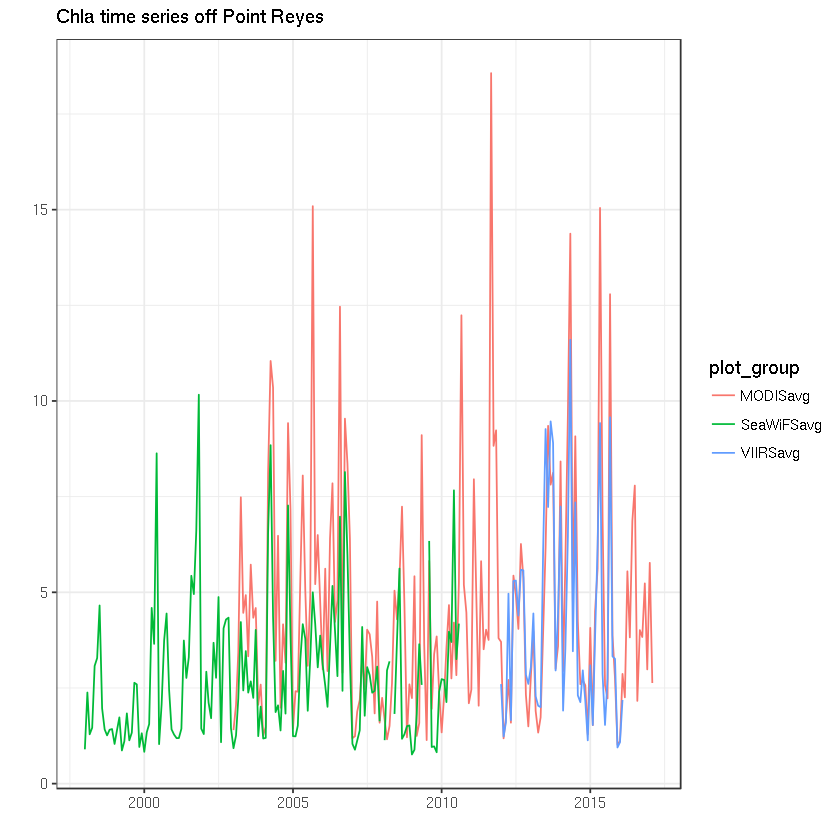

In [26]:
Chla <- cbind(VIIRSavg, MODISavg, SeaWiFSavg)
autoplot(Chla, facets = FALSE) + theme_bw() + ggtitle("Chla time series off Point Reyes")

Warning message:
“Removed 318 rows containing missing values (geom_path).”

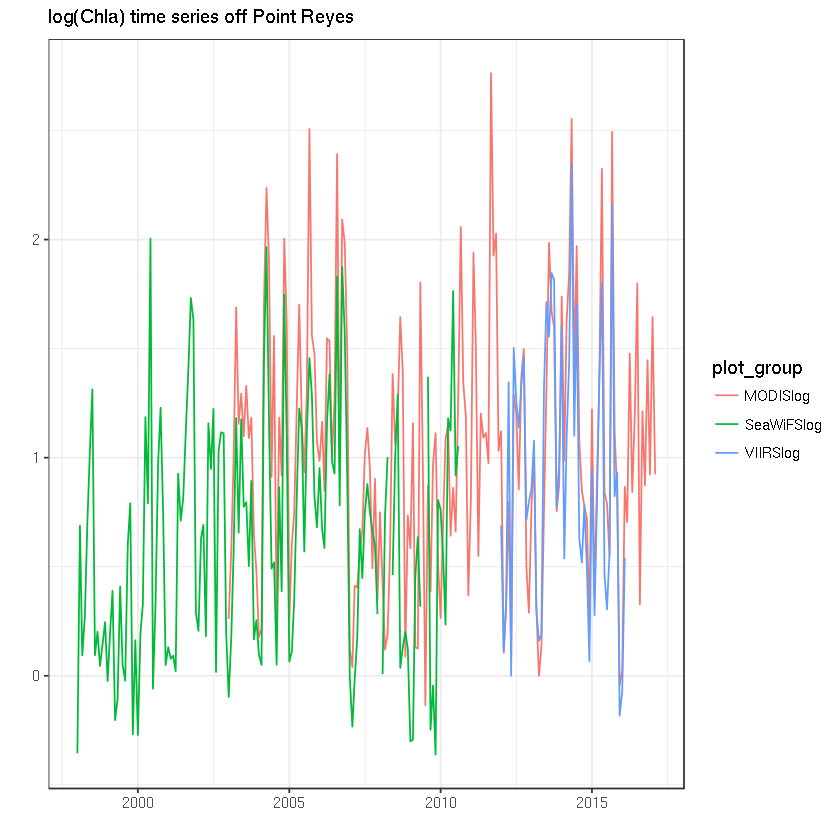

In [27]:
logChla <- cbind(VIIRSlog, MODISlog, SeaWiFSlog)
autoplot(logChla, facets = FALSE) + theme_bw() + ggtitle("log(Chla) time series off Point Reyes")

In [28]:
str(mbnms)

'data.frame':	6666 obs. of  2 variables:
 $ Longitude: num  -123 -123 -123 -123 -123 ...
 $ Latitude : num  37.9 37.9 37.9 37.9 37.9 ...


In [29]:
tpos <- c("2014-09-01" ,"2014-10-01")
xpos <- mbnms$Longitude
ypos <- mbnms$Latitude
sanctchl <- xtractogon(xpos, ypos, tpos, "erdVH2chlamday")
str(sanctchl)

List of 6
 $ data       : num [1:50, 1:57, 1:2] NA NA NA NA NA NA NA NA NA NA ...
 $ varname    : chr "chla"
 $ datasetname: chr "erdVH2chlamday"
 $ latitude   : num [1:57(1d)] 35.6 35.6 35.6 35.7 35.7 ...
 $ longitude  : num [1:50(1d)] -123 -123 -123 -123 -123 ...
 $ time       : chr [1:2] "2014-09-15" "2014-10-15"


Warning message:
“Removed 2055 rows containing missing values (geom_raster).”

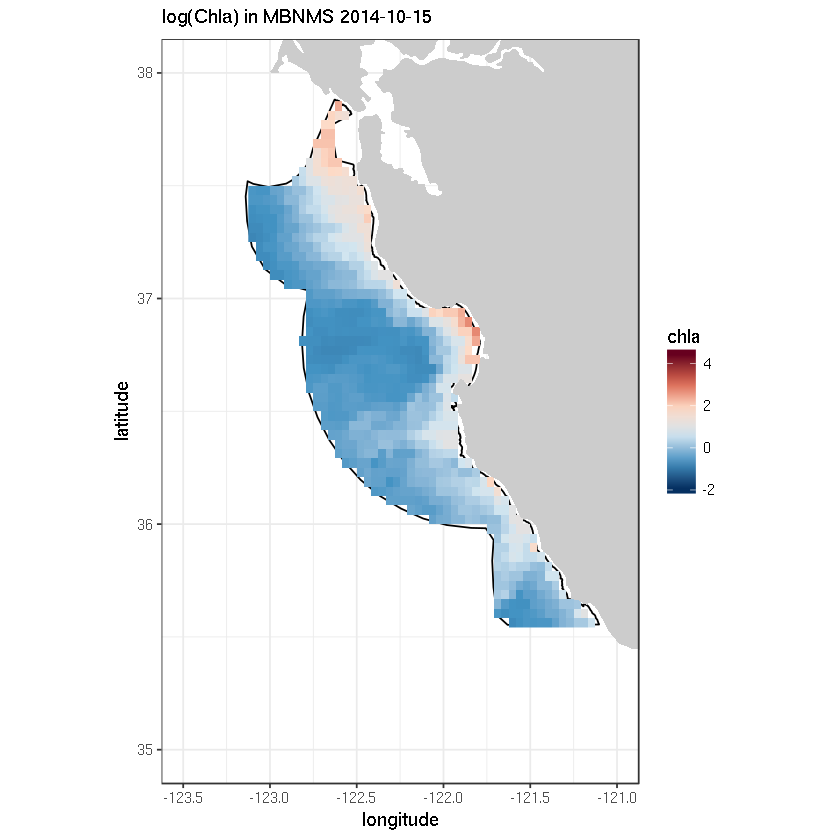

In [30]:
xlim <- c(-123.5, -121.)
ylim <- c(35, 38)
mbnmsFrame <- mapFrame(sanctchl$longitude+360, sanctchl$latitude, log(sanctchl$data[, , 2]))
my.col <- colorRampPalette(rev(brewer.pal(11, "RdBu")))(5.5)  
w <- map_data("worldHires", ylim = ylim, xlim = xlim)
myplot <- ggplot() + geom_path(data=mbnms, aes(x=Longitude, y=Latitude), colour="black")   
myplot<-myplot + 
        geom_raster(data = mbnmsFrame, aes(x = x, y = y, fill = chla), interpolate = FALSE) + 
        geom_polygon(data = w, aes(x=long, y = lat, group = group), fill = "grey80") +
        theme_bw() + scale_fill_gradientn(colours = my.col, na.value = NA, limits=c(-2,4.5)) +
        ylab("latitude") + xlab("longitude") +
        coord_fixed(1.3, xlim = xlim, ylim = ylim) + 
        ggtitle(paste("log(Chla) in MBNMS", sanctchl$time[2]))
myplot